In [59]:
%matplotlib inline
import random

In [60]:
def random_walk(Xt: int) -> int:
    return Xt + 1 if bool(random.getrandbits(1)) else Xt - 1

In [61]:
num_walks = 10000
X = [0]
for t in range (1, num_walks):
    X.append(random_walk(X[t - 1]))

In [62]:
import csv
from datetime import datetime
with open(f'../datasets/rw_{datetime.utcnow()}.csv', 'w', newline='') as csvfile:
    ds_writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    ds_writer.writerow(X)

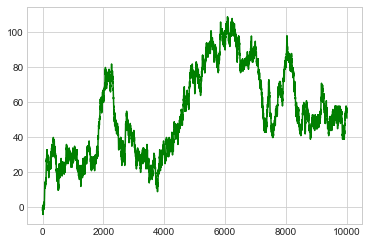

In [63]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X, color = "green")
plt.show()

In [64]:
import numpy as np
ts = np.array(X)

In [65]:
ts.mean()

53.522

In [66]:
ts.std()

24.733683833994483

In [67]:
from math import ceil
def DDF(series):
    return np.histogram(series, bins=int(ceil(max(series))-ceil(min(series))), density=True)    

def E(series):
    x, p = DDF(series)
    return sum([x[i] * p[i] for i in range(len(x))])

def Var(series): 
    p, x = DDF(series)
    u = E(series)
    return sum([p[i] * ((x[i] - u)**2) for i in range(len(p))])

In [68]:
mu = E(X)
sigma = Var(X)
print (f"mu = {mu} sigma={sigma}")

mu = 53.521900000000024 sigma=611.74412039


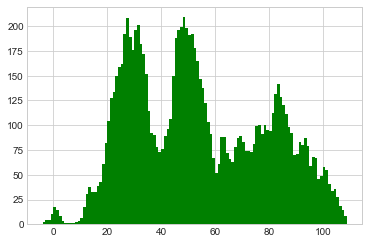

In [69]:
count, bins, ignored  = plt.hist(X, max(X)-min(X), color='green')